## Introduction

Wildfires are a critical issue worldwide, burning millions of hectares each year and impacting everything from the environment to the economy. In 2021 alone, over 2.8 million hectares were burned by nearly 59,000 wildfires globally. While wildfires can occur naturally, human activity is responsible for nearly 90% of wildfires in the United States, a pattern reflected in many other regions.

In Europe, Portugal stands out as one of the countries most affected by wildfires in recent years. The fires not only devastate ecosystems—leading to biodiversity loss and increased carbon emissions—but also pose severe economic challenges. Wildfires in Portugal and beyond result in high costs for recovery and preventive measures, impacting sectors such as agriculture, forestry, and tourism. Burned areas lose productivity, rural communities are threatened, and popular tourist destinations struggle to recover their appeal.

The urgency to address wildfires, both in Portugal and globally, is clear. These fires highlight the need for stronger preventive measures and strategies to mitigate their widespread and lasting impacts.

It’s important to note that humans are responsible for nearly all forest fires, either through negligence or intentional actions. This fact highlights that many fires are not simply natural occurrences but are influenced by human behavior and, potentially, by underlying socioeconomic factors.

With this in mind, this project aims to examine variables such as *population density* and *average salary* to see if they correlate with higher incidences of fires. For instance, in areas with higher population density, there may be more opportunities for human-caused fires, whether through accidents, agricultural practices, or recreational activities. On the other hand, regions with lower incomes might have limited resources for preventive measures or may rely more on agriculture and land clearance—activities that can increase fire risks.

Additionally, since Portugal implemented new wildfire prevention laws in 2017, it’s essential to analyze how these changes impacted fire occurrences. By studying the effects of this legislation, we aim to understand if stricter regulations have been effective in reducing fires, or if other socioeconomic factors continue to drive high fire rates.

Overall, by linking human-caused fire data to socioeconomic indicators, we hope to identify patterns that could inform more effective prevention strategies and policies tailored to each region’s unique characteristics.

In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
import math as m
import statistics
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In this project, we are utilizing the *six-step statistical method* for investigation. This structured approach provides a clear path from problem identification to conclusion, ensuring a systematic and rigorous analysis of the relationship between socioeconomic variables and wildfire occurrences.

### Data Collected

For this analysis, we gathered data from multiple sources.

1. *Wildfire Records:*
   - *File:* Registos_Incendios_SGIF_2011_2020.xlsx
   - *Source:* [ICNF - Instituto da Conservação da Natureza e das Florestas](https://www.icnf.pt/florestas/gfr/gfrgestaoinformacao/estatisticas)
   - *Description:* This dataset contains detailed records of wildfire events from 2011 to 2020, including the date, location, and scale of each fire. By analyzing this information, we can understand the frequency and impact of wildfires across Portugal over a decade.

2. *Salaries by District:*
   - *File:* salaries.csv
   - *Source:* [UGT - União Geral de Trabalhadores](https://www.ugt.pt/Estatisticas/5_16.pdf)
   - *Description:* This dataset covers average salaries by district from 2002 to 2022.

3. *Inflation Rates:*
   - *File:* inflation.xlsx
   - *Description:* This file provides inflation rates from 2011 to 2020, a factor that affects economic stability and purchasing power. 

4. *Population Density by District:*
   - *File:* densidade_populacional.xlsx
   - *Source:* [GEE - Gabinete de Estratégia e Estudos](https://www.gee.gov.pt/pt/mapas-interactivos/informacao-regional)
   - *Description:* This dataset contains information on population density by district.

These diverse data sources provide a comprehensive view of the factors influencing wildfires in Portugal, enabling a multi-faceted analysis of how socioeconomic variables impact fire occurrence.

In [2]:
df_fires_extract = pd.read_excel('Registos_Incendios_SGIF_2011_2020.xlsx')
df_salaries = pd.read_csv('salaries.csv', index_col=0)
df_inflation = pd.read_excel('inflation.xlsx')
density = pd.read_excel('densidade_populacional.xlsx')


### Data Preparation

To focus on the most relevant information for our analysis, we performed data preparation steps that included column selection, duplicate elimination, and handling of missing values.

1. **Column Selection:**  
   Given the goal of examining socioeconomic influences on wildfire occurrences, we retained only the following columns from our original wildfire dataset:
   - `Codigo_SGIF`: Unique identifier for each fire incident
   - `Ano`: Year of the fire incident
   - `Mes`: Month of the fire incident
   - `Dia`: Day of the fire incident
   - `Hora`: Time of the fire incident
   - `AreaTotal_ha`: Total area affected by the fire in hectares
   - `DataHoraAlerta`: Date and time of the fire alert
   - `Distrito`: District in which the fire occurred
   - `Concelho`: Municipality of the fire occurrence
   - `Freguesia`: Parish of the fire occurrence

   These columns allow us to analyze the temporal and spatial distribution of fires, along with their scale. Some variables were missing a lot of values. And since those do not impact this study, we decided to not count them in our dataset.

2. **Duplicate Removal:**  
   To ensure data quality, we checked for and removed any duplicate entries in the dataset, which could skew our results by artificially inflating the number of recorded incidents.

3. **Handling Missing Values:**  
   Rows with missing values in the selected columns were removed. This step was essential to maintain the integrity of our analysis.

By carefully curating our data, we ensured that the dataset remains both relevant and reliable for analyzing the socioeconomic factors impacting wildfires in Portugal.


([], [])

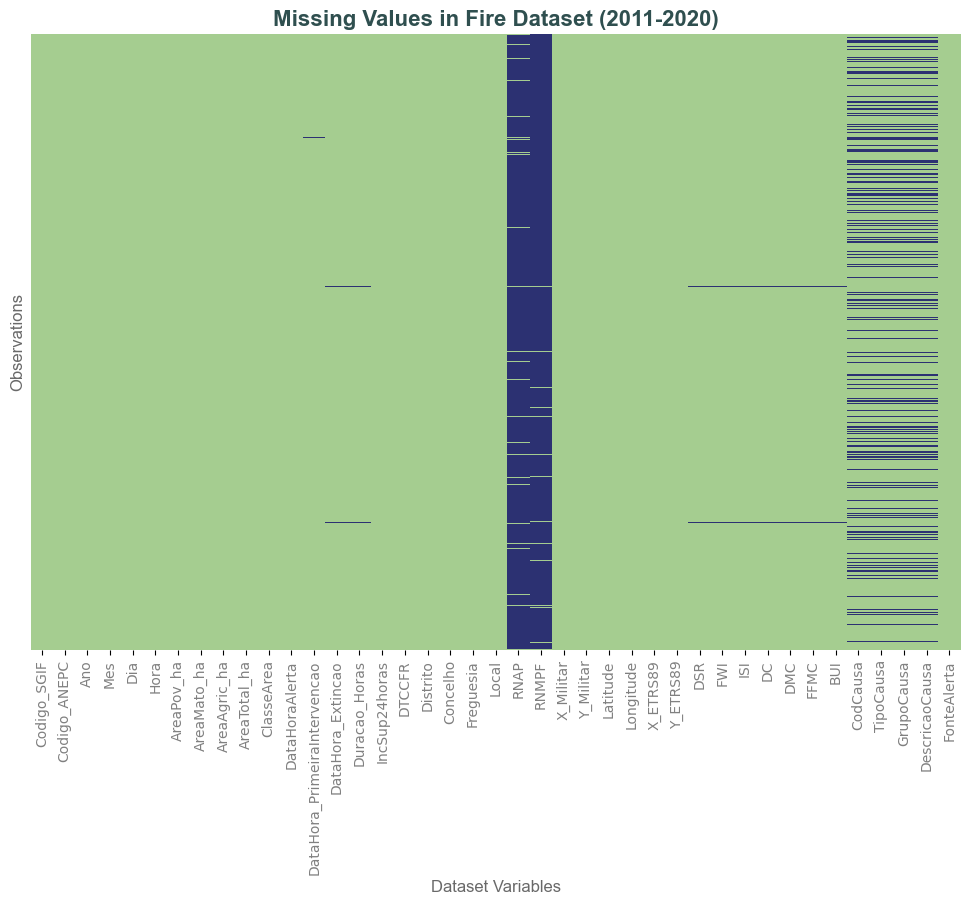

In [3]:
df_fires_extract = df_fires_extract.drop_duplicates()

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_fires_extract.isnull(), 
    cbar=False, 
    cmap='crest',  
    yticklabels=False
)


plt.title('Missing Values in Fire Dataset (2011-2020)', fontsize=16, weight='bold', color='darkslategray', family='Arial')
plt.xlabel('Dataset Variables', fontsize=12, color='dimgray', family='Arial')
plt.ylabel('Observations', fontsize=12, color='dimgray', family='Arial')
plt.xticks(fontsize=10, color='gray')
plt.yticks([])  


In [4]:
df_fires_extract.head()

,Codigo_SGIF,Codigo_ANEPC,Ano,Mes,Dia,Hora,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,...,ISI,DC,DMC,FFMC,BUI,CodCausa,TipoCausa,GrupoCausa,DescricaoCausa,FonteAlerta
0,DM2111,368,2011,1,1,17,0.0,0.010,0.00000,0.01000,...,0.291930,4.092373,0.653638,54.525424,0.934234,145.0,Negligente,Uso do fogo - Fogueiras,Fogueiras - Outras,Populares
1,BL4112,1236,2011,1,9,22,0.0,0.000,0.00200,0.00200,...,0.013831,1.835452,0.367371,32.001278,0.489703,610.0,Desconhecida,Indeterminadas,Indeterminadas - Prova material,Populares
2,DM3111,820,2011,1,15,17,0.0,0.000,0.00001,0.00001,...,1.171990,9.658571,1.573768,74.889775,2.236498,124.0,Negligente,Queimas amontoados de sobrantes florestais ou ...,Queima de amontoados - Borralheiras,Populares
3,BL2111,1977,2011,1,18,22,0.0,0.001,0.00000,0.00100,...,0.248910,12.477199,0.762519,51.102608,1.322920,124.0,Negligente,Queimas amontoados de sobrantes florestais ou ...,Queima de amontoados - Borralheiras,Populares
4,DM2113,7930,2011,1,19,17,0.0,0.005,0.00000,0.00500,...,0.008092,3.968661,0.508191,32.290416,0.769912,NaN,NaN,NaN,NaN,Populares


**Removing duplicates and missing values**

177129


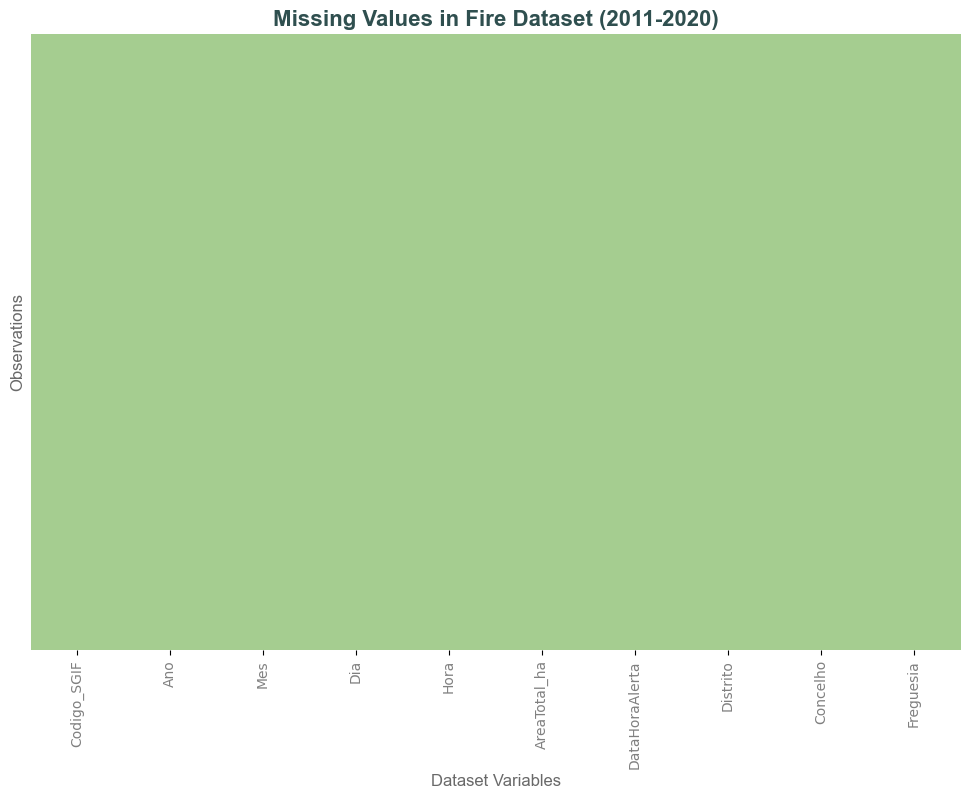

In [5]:
df_fires_extract = df_fires_extract[['Codigo_SGIF','Ano','Mes','Dia',
 'Hora', 'AreaTotal_ha', 'DataHoraAlerta',
 'Distrito', 'Concelho',
 'Freguesia']]


df_fires_extract = df_fires_extract.dropna()

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_fires_extract.isnull(), 
    cbar=False, 
    cmap='crest',  # Neutral color palette
    yticklabels=False
)

# Customize title and labels
plt.title('Missing Values in Fire Dataset (2011-2020)', fontsize=16, weight='bold', color='darkslategray', family='Arial')
plt.xlabel('Dataset Variables', fontsize=12, color='dimgray', family='Arial')
plt.ylabel('Observations', fontsize=12, color='dimgray', family='Arial')
plt.xticks(fontsize=10, color='gray')
plt.yticks([])  # Hide y-axis labels

print(len(df_fires_extract))

### Data Exploration

To gain initial insights into wildfire occurrences across Portugal, we explored the distribution of fire incidents by district over the 2011-2020 period.

- **Total Fires**: Our dataset includes a total of **176,385 recorded fires**.
- **Fire Distribution by District**:  
  The number of fires varies significantly across districts, highlighting areas that are more frequently affected by wildfires. Visualizing the number of fires per district gives a clearer view of regional differences in fire incidence.

The chart below displays the fire count for each district, helping to identify which regions may have the higher number of wildfires. Understanding these patterns will provide context as we explore the impact of socioeconomic variables on fire occurrences.


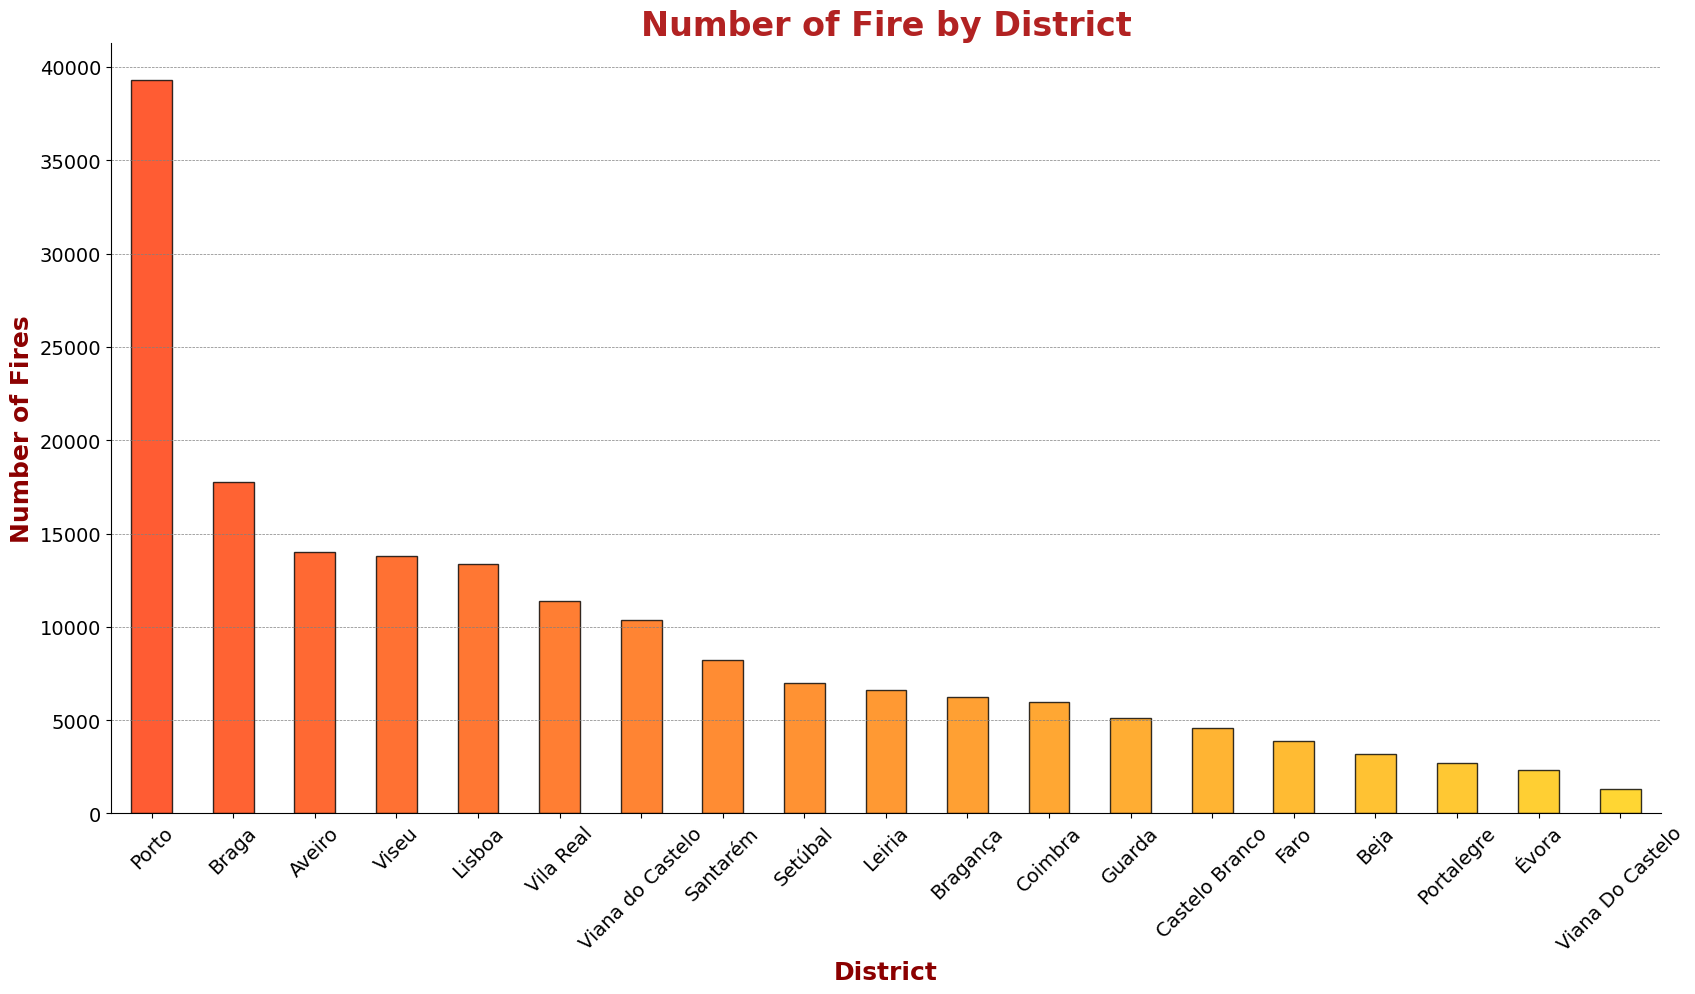

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


# Preparing the counts for plotting
district_counts = df_fires_extract['Distrito'].value_counts()

# Customizing the plot appearance
fig, ax = plt.subplots(figsize=(20, 10))
district_counts.plot(
    kind='bar',
    color='darkred',  # Fire-themed base color
    ax=ax,
    legend=False,
    alpha=0.8,
    edgecolor='black'
)

# Styling adjustments
ax.set_title("Number of Fire by District", fontsize=24, fontweight='bold', color='firebrick', family='DejaVu Sans')
ax.set_xlabel("District", fontsize=18, fontweight='bold', color='darkred', family='DejaVu Sans')
ax.set_ylabel("Number of Fires", fontsize=18, fontweight='bold', color='darkred', family='DejaVu Sans')
ax.tick_params(axis='x', labelsize=14, rotation=45, colors='black')
ax.tick_params(axis='y', labelsize=14, colors='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Apply a gradient effect to the bars
for i, bar in enumerate(ax.patches):
    bar.set_facecolor((1.0, 0.2 + i / 30, 0.0, 1.0))  # RGBA color with values in the 0-1 range


## Analysis of the Effect of Population Density on the Number of Fires in Portuguese Districts

**Research Question:** How does population density influence the number of fires in the districts of Porto, Aveiro, and Coimbra for the years 2011, 2016, and 2019?

This study performs three primary statistical analyses to examine the relationship between population density and fire incidence:

1. **Correlation Analysis**: The Spearman correlation coefficient is used to quantify the strength and direction of the monotonic relationship between population density and the number of fires. A strong positive correlation would suggest that as population density increases, fire incidence tends to rise in a consistent manner, indicating a possible influence of density on fire occurrence even if the relationship is not strictly linear.

2. **One-Sample t-Test for Means**: This test assesses whether the average number, for each year, significantly differs from the mean fire count across all districts in a single year. If districts with higher population density exhibit a higher mean fire count than this overall average, it would suggest a potential influence of population density on fire frequency.

3. **Two-Sample t-Test for Means**: This test compares the average fire count between districts with differing levels of population density. By examining whether districts with higher population density show significantly different fire counts from those with lower density, this test can help to identify if population density plays a role in the variation in fire incidence between districts.

> **Note**: While several variables can influence fire incidence, such as climate conditions, vegetation type, and socio-economic factors, this study focuses specifically on the effect of population density on the number of fires by district and year.

**Data Source for Population Density**: [GEE - Interactive Regional Information](https://www.gee.gov.pt/pt/mapas-interactivos/informacao-regional/inforegional/show/inforegional)

In [8]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Configure plot styles
sns.set(style="whitegrid")
%matplotlib inline


Data Preparation for the tests

In [9]:


# Load number of fires data
fires = pd.read_excel('Estatisticas_Incendios_SGIF_2001_2023.xlsx', sheet_name=1)

# Filter data for the distritos and anos of interest
distritos = ['Porto', 'Aveiro', 'Coimbra']
anos = [2011, 2016, 2019]

density_filtered = density[(density['Distrito'].isin(distritos)) & (density['Ano'].isin(anos))]
fires_filtered = fires[(fires['Distrito'].str.upper().isin([d.upper() for d in distritos])) 
                                        & (fires['Ano'].isin(anos))]

fires_regression = fires[(fires['Distrito'].str.upper().isin([d.upper() for d in distritos]))]

# Filtrar colunas específicas em cada DataFrame
density_filtered = density_filtered[['Ano', 'Distrito', 'Densidade_Populacional']]
fires_filtered = fires_filtered[['Ano', 'Distrito', 'Num_IncendiosRurais']]
fires_regression = fires_regression[['Ano', 'Distrito', 'Num_IncendiosRurais']]

# Converter distritos para maiúsculas para garantir a correspondência
density['Distrito'] = density['Distrito'].str.upper()
density_filtered['Distrito'] = density_filtered['Distrito'].str.upper()
fires_filtered['Distrito'] = fires_filtered['Distrito'].str.upper()
fires_regression['Distrito'] = fires_regression['Distrito'].str.upper()


# Realizar o merge das tabelas filtradas
data = pd.merge(
    density_filtered,
    fires_filtered,
    how='inner',  # junção interna para incluir apenas correspondências
    on=['Ano', 'Distrito']
)

# Realizar o merge das tabelas filtradas
data_regression = pd.merge(
    density,
    fires_regression,
    how='inner',  # junção interna para incluir apenas correspondências
    on=['Ano', 'Distrito']
)

# Visualizar o resultado
data

,Ano,Distrito,Densidade_Populacional,Num_IncendiosRurais
0,2011,AVEIRO,254.58,3096
1,2011,COIMBRA,107.44,987
2,2011,PORTO,744.67,6691
3,2016,AVEIRO,249.53,898
4,2016,COIMBRA,103.26,456
5,2016,PORTO,727.72,4285
6,2019,AVEIRO,248.97,817
7,2019,COIMBRA,101.97,314
8,2019,PORTO,730.47,1842


### Descriptive Statistical Analysis

#### Visualization of Data

To understand the relationship between population density and the number of fires across the districts of Porto, Aveiro, and Coimbra in the years 2011, 2016, and 2019, we created a scatter plot. This plot visualizes how variations in population density correlate with the frequency of fires, helping to identify any initial patterns or trends.

Each point on the scatter plot represents a district-year combination, color-coded by district and styled by year, to visually assess if higher population densities align with increased fire occurrences.

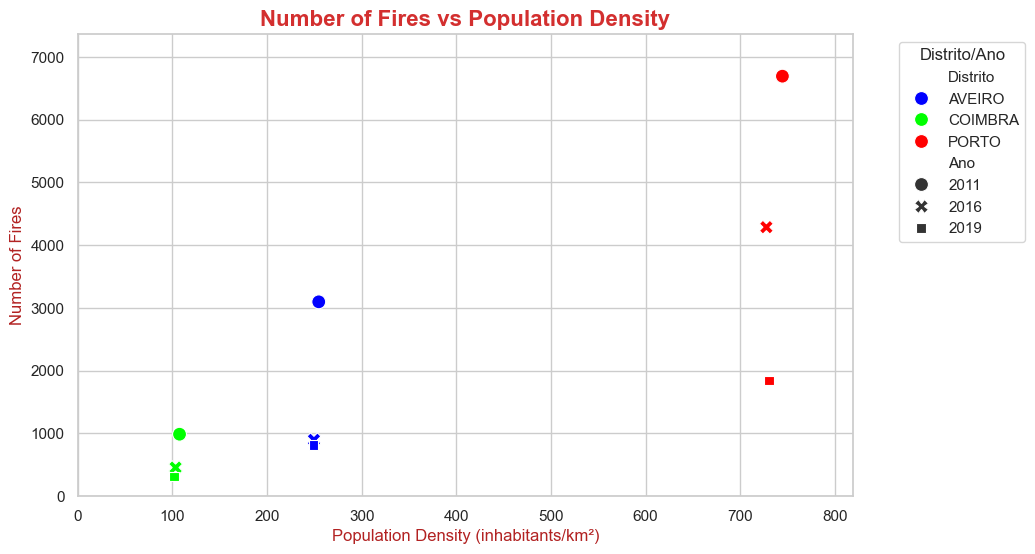

In [10]:
# Set specific colors for each district (using blue, green, and red)
sns.set_palette(sns.color_palette(["#0000FF", "#00FF00", "#FF0000"]))  # Blue, Green, Red

# Create the scatter plot with adjusted limits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Densidade_Populacional', y='Num_IncendiosRurais', hue='Distrito', style='Ano', s=100)

# Customize the plot title, axis labels, and legend
plt.title('Number of Fires vs Population Density', fontsize=16, weight='bold', color='#d32f2f')
plt.xlabel('Population Density (inhabitants/km²)', fontsize=12, color='#b22222')
plt.ylabel('Number of Fires', fontsize=12, color='#b22222')

# Adjust axis limits
plt.xlim(0, data['Densidade_Populacional'].max() * 1.1)
plt.ylim(0, data['Num_IncendiosRurais'].max() * 1.1)

# Position the legend outside the plot area
plt.legend(title='Distrito/Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observations from the Scatter Plot

In the scatter plot showing the number of fires versus population density for the districts of Porto, Aveiro, and Coimbra across the years 2011, 2016, and 2019, we can observe the following:

1. **Porto - Highest Density and Most Fires**: Porto, shown in red, has the highest population density among the three districts and also experiences the highest number of fires across the years. This suggests a potential positive association where higher population density may contribute to increased fire occurrences.

2. **Aveiro - Moderate Density and Fire Count**: Aveiro, represented in blue, has a moderate population density compared to the other districts and shows a moderate number of fires, less than Porto but more than Coimbra. This consistency in ranking supports the hypothesis that population density could influence the number of fires.

3. **Coimbra - Lowest Density and Fewest Fires**: Coimbra, marked in green, has the lowest population density and also reports the fewest fires among the three districts. This further aligns with the trend where lower-density regions appear to experience fewer fire incidents.

These observations support a potential link between population density and the frequency of fires, with higher density areas such as Porto experiencing more fires, followed by Aveiro and then Coimbra. Additional statistical tests are needed to determine the significance and strength of this relationship.

In [11]:

# Descriptive statistics
statistics = data_regression[['Densidade_Populacional', 'Num_IncendiosRurais']].describe()
statistics


,Densidade_Populacional,Num_IncendiosRurais
count,30.000000,30.000000
mean,362.550333,1974.933333
std,273.308955,1828.668140
min,101.970000,230.000000
25%,105.547500,675.000000
50%,250.145000,1172.000000
75%,728.275000,2458.500000
max,744.670000,6691.000000


## Correlation Analysis

### Spearman Correlation Coefficient

The Spearman correlation coefficient is calculated to measure the strength and direction of the monotonic relationship between population density and the number of fires in the districts of Porto, Aveiro, and Coimbra. This analysis helps us understand whether an increase in population density is consistently associated with an increase in fire occurrences, even if the relationship is not strictly linear.

A positive Spearman correlation coefficient close to +1 would suggest a strong positive monotonic association, indicating that higher population densities tend to correspond to a higher number of fires. Conversely, a coefficient close to 0 would imply a weak or no monotonic relationship between population density and fire frequency.


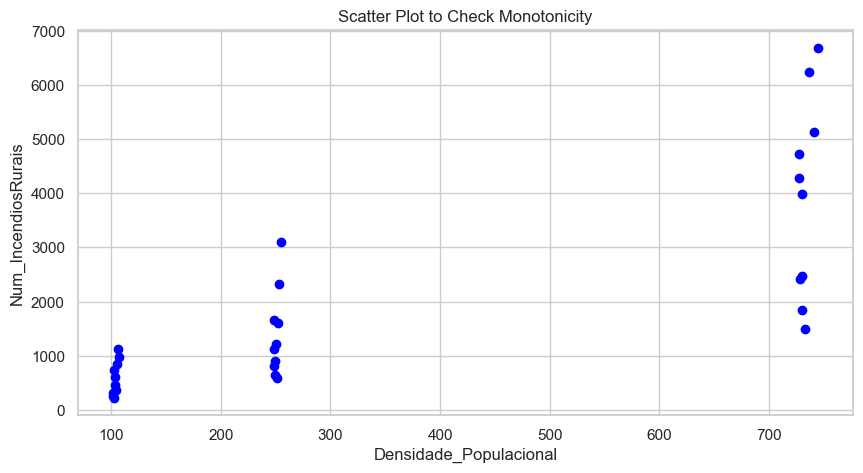

Spearman Correlation Coefficient: 0.8785

Data Types:
Densidade_Populacional    float64
Num_IncendiosRurais         int64
dtype: object

Number of ties in Densidade_Populacional: 0
Number of ties in Num_IncendiosRurais: 0


In [12]:
# 1. Check for Monotonic Relationship with a Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(data_regression['Densidade_Populacional'], data_regression['Num_IncendiosRurais'], color='blue')
plt.xlabel('Densidade_Populacional')
plt.ylabel('Num_IncendiosRurais')
plt.title('Scatter Plot to Check Monotonicity')
plt.show()

# Calculate Spearman’s rank correlation coefficient to confirm monotonic relationship
spearman_corr = data_regression['Densidade_Populacional'].corr(data_regression['Num_IncendiosRurais'], method='spearman')
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")

# 2. Data Type Check
# Verify that the data is numeric (interval/ratio scale) or ordinal
print("\nData Types:")
print(data_regression[['Densidade_Populacional', 'Num_IncendiosRurais']].dtypes)

# 3. Check for Ties in the Data
# Count duplicate values in each column
ties_population = data_regression['Densidade_Populacional'].duplicated().sum()
ties_incendios = data_regression['Num_IncendiosRurais'].duplicated().sum()

print(f"\nNumber of ties in Densidade_Populacional: {ties_population}")
print(f"Number of ties in Num_IncendiosRurais: {ties_incendios}")

### Conditions Verification

Based on the provided output:

1. **Monotonic Relationship**:
   - The scatter plot shows a consistent upward trend, indicating a monotonic relationship between population density and number of fires.
   - The Spearman correlation coefficient of 0.8785 suggests a strong positive monotonic relationship, which confirms that the condition of monotonicity is met.

2. **Data Type**:
   - The data types of population density (float64) and number of fires (int64) are numeric, satisfying the requirement for Spearman's correlation.

3. **Ties in Data**:
   - There are zero ties in both population density and number of fires, meaning that Spearman’s correlation calculation is not affected by duplicate values.

All conditions for applying Spearman’s rank correlation are satisfied.

### Conclusion

The Spearman correlation coefficient of 0.8785 indicates a strong positive monotonic association between population density and the number of fires in the districts of Porto, Aveiro, and Coimbra. This suggests that as population density increases, there is a consistent trend towards an increase in the number of fires. While this does not imply causation, it highlights a notable association that could be relevant for understanding factors influencing fire occurrences in more densely populated areas.




# Difference of two means and One-sample means with the t-distribution
To investigate the impact of population density on fire frequency, we use two key statistical tests:

- **One-Sample t-Test**: Compares the mean fire count in each district to an average to assess if each district’s fire count significantly deviates from expectation.
- **Two-Sample t-Test**: Compares the mean fire counts between districts with differing population densities to determine if density influences the difference in fire occurrences.

These tests help us understand whether districts with higher population densities experience significantly more fires.

## Data Sampling

### Purpose of Data Sampling

To conduct a reliable statistical analysis, a sampling approach was used to create subsets of fire counts for each district (Porto, Aveiro, and Coimbra) for a selected year (e.g., 2019). This approach allows for repeated sampling to examine the distribution of fire counts within each district, providing a more robust foundation for hypothesis testing and comparisons.

A sample size of 300 was chosen, and 100 samples were taken for each district. By using multiple samples, we can assess the variability in fire counts across samples and obtain a more accurate representation of fire incidence trends across different districts.

In [13]:
# Sampling fire counts for specific districts
target_year = 2019 # Adjust year as needed
sample_size1 = 300
num_samples1 = 100
porto_counts, aveiro_counts, coimbra_counts = [], [], []
sample_dataframes = []

filtered_data = df_fires_extract[df_fires_extract['Ano'] == target_year]


for i in range(num_samples1):
    
    sample = filtered_data.sample(n=min(sample_size1, len(filtered_data)), random_state=i)
    
    district_counts = sample['Distrito'].value_counts()
    
    porto_counts.append(district_counts.get('Porto', 0))
    aveiro_counts.append(district_counts.get('Aveiro', 0))
    coimbra_counts.append(district_counts.get('Coimbra', 0))
    
    sample_dataframes.append(sample)

# Exemplo de visualização das contagens de incêndios
print("Porto Counts:", porto_counts[:5])
print("Aveiro Counts:", aveiro_counts[:5])
print("Coimbra Counts:", coimbra_counts[:5])

Porto Counts: [np.int64(59), np.int64(56), np.int64(50), np.int64(46), np.int64(50)]
Aveiro Counts: [np.int64(20), np.int64(23), np.int64(26), np.int64(25), np.int64(17)]
Coimbra Counts: [np.int64(8), np.int64(8), np.int64(9), np.int64(10), np.int64(10)]


Porto Shapiro-Wilk p-value: 0.3416565991458561
Aveiro Shapiro-Wilk p-value: 0.6041938566980022
Coimbra Shapiro-Wilk p-value: 0.04496648492918293


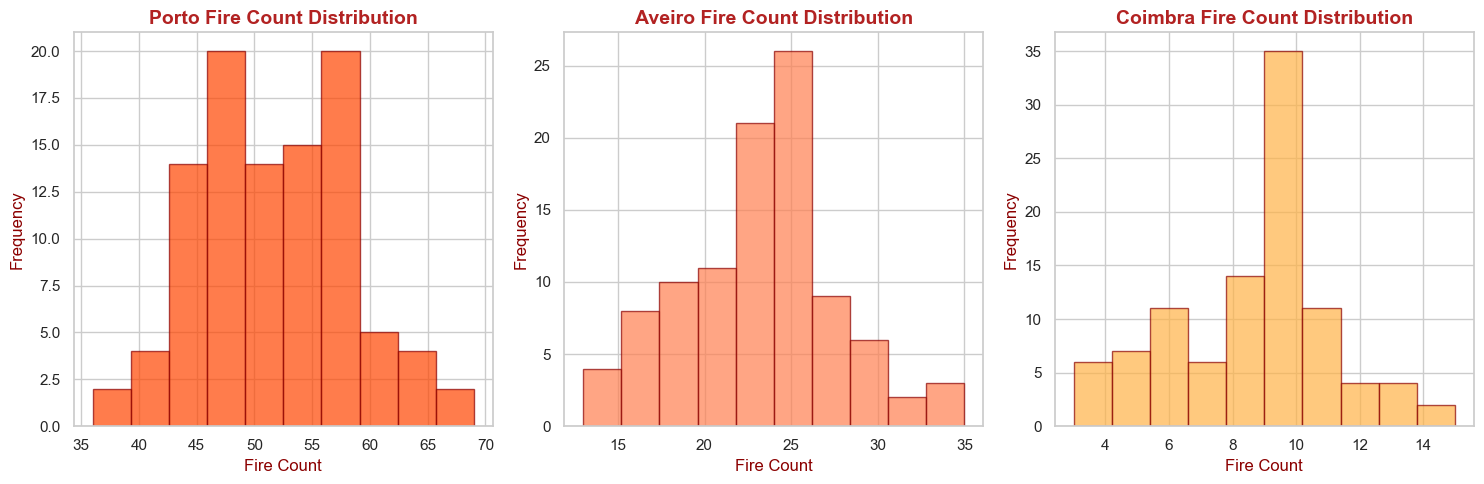

In [14]:
# Set a fiery color palette
fire_colors = ["#ff4500", "#ff7f50", "#ffb347"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (counts, district, color) in enumerate(zip([porto_counts, aveiro_counts, coimbra_counts], 
                                                  ['Porto', 'Aveiro', 'Coimbra'], fire_colors)):
    axes[i].hist(counts, bins=10, alpha=0.7, color=color, edgecolor='#8b0000')  # Darker edge color
    axes[i].set_title(f'{district} Fire Count Distribution', fontsize=14, weight='bold', color='#b22222')
    axes[i].set_xlabel('Fire Count', fontsize=12, color='#8b0000')
    axes[i].set_ylabel('Frequency', fontsize=12, color='#8b0000')
    print(f'{district} Shapiro-Wilk p-value:', stats.shapiro(counts).pvalue)

fig.tight_layout()
plt.show()

### Normality Test (Shapiro-Wilk)

A Shapiro-Wilk normality test was performed on the fire count distributions for each district (Porto, Aveiro, and Coimbra) to assess whether the data follows a normal distribution. The p-values for each district are as follows:

### Interpretation of Results

All districts have p-values above or close to the common significance level of 0.05, which suggests that we fail to reject the null hypothesis that the fire count distributions for Porto, Aveiro, and Coimbra are normally distributed. Despite Coimbra’s p-value being slightly close to 0.05, it is still considered within acceptable limits for normality.

### Assumption of Independence

In addition to normality, the independence of data points is crucial for valid statistical analysis. Here, independence implies that each fire count is not influenced by the others. Since the fire counts are collected separately for each district and represent individual incidents, we can reasonably assume that the data points are independent. This independence is essential to ensure that statistical tests, such as t-tests, provide reliable results.

### Conclusion

With both normality and independence assumptions met, we can proceed with parametric statistical analyses on the fire count data for Porto, Aveiro, and Coimbra. These assumptions strengthen the validity of any inferences drawn regarding the relationship between population density and fire frequency.

## One-Sample Means with the t-Distribution

### Hypotheses
For a specific target year, this one-sample t-test examines whether the mean number of fires for each district (Porto, Aveiro, and Coimbra) differs significantly from a  population mean. The hypotheses for each district are as follows:

- **Null Hypothesis (H0)**: The mean number of fires in the district is equal to the hypothetical average fire count (overall average fire count across all districts in a single year). Population density does not significantly influence the mean number of fires.


- **Alternative Hypothesis (H1)**: The mean number of fires in the district is different from the hypothetical average fire count, suggesting that population density may influence the number of fires.


### Purpose of the One-Sample t-Test

This test helps to determine if the average fire count in each district significantly deviates from a set baseline, which could suggest an impact of population density on fire incidence. A significant result (p-value < 0.05) would indicate that the fire count in that district is not aligned with the hypothetical average, potentially implying that factors like population density play a role in fire frequency.



In [15]:
# Convert counts to numpy arrays for statistical analysis
porto_counts = np.array(porto_counts)
aveiro_counts = np.array(aveiro_counts)
coimbra_counts = np.array(coimbra_counts)

# Hypothetical population mean equal number of fires 
fire_mean = sample_size1/18

fire_mean1 = fires.groupby('Distrito')['Num_IncendiosRurais'].mean().mean()
#print("Fire Mean (based on actual counts):", fire_mean)
adjusted_fire_mean1 = (fire_mean / len(fires)) * sample_size1
#print("adjusted_fire_mean", adjusted_fire_mean)
# One-sample t-tests for each district
# Porto
t_stat_porto, p_val_porto = stats.ttest_1samp(porto_counts, adjusted_fire_mean1)
print(f"Porto - T-statistic: {t_stat_porto}, P-value: {p_val_porto}")

# Aveiro
t_stat_aveiro, p_val_aveiro = stats.ttest_1samp(aveiro_counts, adjusted_fire_mean1)
print(f"Aveiro - T-statistic: {t_stat_aveiro}, P-value: {p_val_aveiro}")

# Coimbra
t_stat_coimbra, p_val_coimbra = stats.ttest_1samp(coimbra_counts, adjusted_fire_mean1)
print(f"Coimbra - T-statistic: {t_stat_coimbra}, P-value: {p_val_coimbra}")


Porto - T-statistic: 59.89260328184908, P-value: 1.4045896122687772e-79
Aveiro - T-statistic: 24.78518768062104, P-value: 3.0309690583369073e-44
Coimbra - T-statistic: -13.820135795437752, P-value: 7.709645960312067e-25


### Conclusion of One-Sample t-Test Results

The one-sample t-test was conducted for each district to determine whether the mean number of fires significantly deviates from the hypothetical average fire count. The results are above.

### Interpretation

1. **Porto**: The p-value for Porto is significantly below the 0.05 threshold (1.4045896122687772e-79), indicating a strong rejection of the null hypothesis. This suggests that the mean number of fires in Porto is significantly different from the hypothetical average, likely influenced by the higher population density in this district.

2. **Aveiro**: The p-value for Aveiro is also below 0.05 (3.0309690583369073e-44). This indicates a statistically significant difference from the hypothetical average fire count, suggesting that factors, potentially including population density, might affect the fire count in this district as well.

3. **Coimbra**: Similar to Porto, the p-value for Coimbra is far below 0.05 (P-value: 7.709645960312067e-25), resulting in a strong rejection of the null hypothesis. However, the negative t-statistic indicates that Coimbra's mean fire count is significantly lower than the hypothetical average, likely due to its lower population density.

### Conclusion

The results show statistically significant differences between the observed and hypothetical average fire counts for all three districts:
- Porto and Aveiro have mean fire counts higher than expected, possibly due to their higher population densities.
- Coimbra has a mean fire count significantly lower than expected, which may be influenced by its lower population density.

These findings support the hypothesis that population density may impact fire frequency, as districts with higher densities tend to have higher mean fire counts.

## Difference of Two Means

### Hypotheses

For this two-sample t-test, we want to determine if there is a significant difference in the mean number of fires between pairs of districts with differing population densities. The hypotheses for each pair of districts (e.g., Porto vs. Aveiro, Coimbra vs. Aveiro) are as follows:

- **Null Hypothesis (H0)**: There is no significant difference in the mean number of fires between the two districts. Population density does not significantly influence the difference in fire counts.

- **Alternative Hypothesis (H1)**: There is a significant difference in the mean number of fires between the two districts, suggesting that population density may influence the difference in fire counts.

### Purpose of the Two-Sample t-Test

This test helps to determine if the difference in mean fire counts between districts with varying population densities is statistically significant. A significant result (p-value < 0.05) would suggest that population density may contribute to differences in fire frequencies between districts.

In [16]:
t_test_result = stats.ttest_ind(porto_counts, 
                          aveiro_counts, 
                          equal_var=True)

print('\nIndependent Samples T-Test Result:', t_test_result)

t_test_result = stats.ttest_ind(coimbra_counts, 
                          aveiro_counts, 
                          equal_var=True)

print('\nIndependent Samples T-Test Result:', t_test_result)


Independent Samples T-Test Result: TtestResult(statistic=np.float64(35.79871710672028), pvalue=np.float64(2.0464166544284055e-88), df=np.float64(198.0))

Independent Samples T-Test Result: TtestResult(statistic=np.float64(-28.37780918018288), pvalue=np.float64(1.0677374990297534e-71), df=np.float64(198.0))


### Conclusion of the Two-Sample t-Test Results

The independent samples t-test was conducted to assess whether there is a statistically significant difference in the mean number of fires between districts with differing population densities. The results are as follows:

### Interpretation

1. **Porto vs. Aveiro**: The p-value for the comparison between Porto and Aveiro is extremely small (2.0464166544284055e-88), well below the 0.05 significance threshold. This result strongly rejects the null hypothesis, indicating a significant difference in the mean fire counts between these two districts. Given that Porto has a higher population density than Aveiro, this difference suggests that population density may be a factor influencing the higher fire count in Porto.

2. **Coimbra vs. Aveiro**: Similarly, the p-value for the comparison between Coimbra and Aveiro is extremely small (1.0677374990297534e-71), which also strongly rejects the null hypothesis. The negative t-statistic indicates that Coimbra has a significantly lower mean fire count compared to Aveiro. Since Coimbra has a lower population density than Aveiro, this difference aligns with the expectation that lower-density areas experience fewer fires.

### Conclusion

These results provide strong evidence that there are statistically significant differences in fire counts between districts with differing population densities:
- Porto, with the highest population density, has a significantly higher mean fire count compared to Aveiro.
- Coimbra, with the lowest population density, has a significantly lower mean fire count compared to Aveiro.

These findings support the hypothesis that population density may influence the frequency of fires, with higher-density districts experiencing more fires on average.


## Research Question 2: How Does Salary Impact the Number of Fires?

To explore the relationship between salaries and the number of fires, we hypothesized that economic factors, such as income levels, might influence fire incidence. Specifically, we wanted to examine whether there is a link between the average salary in each district and the frequency of fires.

1. **Data Source**:  
   We used the **salaries.csv** file, which provides salary data by district for the years 2002 to 2022, sourced from UGT. This data allowed us to examine economic conditions across different regions.

2. **Data Adjustment for Inflation**:  
   To ensure accuracy and relevance, we adjusted the salary data for inflation, converting historical values to present-day equivalents. This inflation-adjusted data enables a more realistic comparison across years, allowing us to capture the potential socioeconomic influence on fire incidences over time.

This analysis will help us understand whether districts with lower or higher salary levels experience more frequent fires, offering insights into the socioeconomic dynamics that may contribute to fire risks.


In [17]:
def adjust_inflation_2011_2020(salaries):
    inflation_rates = df_inflation['Percentagem']
    inflation_factors = 1 + (inflation_rates / 100)

    cum_inflation_factors = np.cumprod(inflation_factors[::-1][::-1])

    if len(salaries) != len(cum_inflation_factors):
        raise ValueError("Length of salaries and cumulative inflation factors do not match.")
    
    # print(cum_inflation_factors)
    adjusted_inflation_factors = cum_inflation_factors[len(cum_inflation_factors) - 1] / cum_inflation_factors
    for i in range(len(salaries)):
        salaries[i] = salaries[i] * adjusted_inflation_factors[i]

    return salaries

In [18]:
salaries_porto = df_salaries.loc['Porto']
salaries_coimbra = df_salaries.loc['Coimbra']
salaries_aveiro = df_salaries.loc['Aveiro']

salaries_porto_2011_2020 = df_salaries.transpose()['Porto'][9:19]
salaries_porto_2011_2020 = adjust_inflation_2011_2020(salaries_porto_2011_2020)

salaries_coimbra_2011_2020 = df_salaries.transpose()['Coimbra'][9:19]
salaries_coimbra_2011_2020 = adjust_inflation_2011_2020(salaries_coimbra_2011_2020)

salaries_aveiro_2011_2020 = df_salaries.transpose()['Aveiro'][9:19]
salaries_aveiro_2011_2020 = adjust_inflation_2011_2020(salaries_aveiro_2011_2020)

fire_count_porto = df_fires_extract[df_fires_extract['Distrito'] == 'Porto'].groupby(df_fires_extract['Ano']).count()['Ano']
fire_count_coimbra = df_fires_extract[df_fires_extract['Distrito'] == 'Coimbra'].groupby(df_fires_extract['Ano']).count()['Ano']
fire_count_aveiro = df_fires_extract[df_fires_extract['Distrito'] == 'Aveiro'].groupby(df_fires_extract['Ano']).count()['Ano']


/var/folders/st/v4p9lsyx3yj_pwz5bhz_9_vm0000gn/T/ipykernel_5011/3181110198.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  salaries[i] = salaries[i] * adjusted_inflation_factors[i]
/var/folders/st/v4p9lsyx3yj_pwz5bhz_9_vm0000gn/T/ipykernel_5011/3181110198.py:13: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  salaries[i] = salaries[i] * adjusted_inflation_factors[i]
/var/folders/st/v4p9lsyx3yj_pwz5bhz_9_vm0000gn/T/ipykernel_5011/3181110198.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

### Exploring the Impact of Salaries on Fire Incidence

To assess the relationship between socioeconomic factors and fire incidence, we analyzed the correlation between average salaries and fire counts across multiple districts in Portugal: Porto, Coimbra, and Aveiro. Our approach involved computing correlation coefficients for each district to measure the degree of association between salary levels and fire frequency. We then visualized these relationships with regression plots, observing whether higher or lower salaries were associated with more or fewer fire incidents. A negative correlation would suggest that higher salaries might coincide with fewer fire incidents, potentially indicating more resources for preventive measures. Conversely, a positive correlation would imply an increase in fire incidents as salaries rise, possibly due to factors like urban expansion or other socioeconomic activities.


Correlation coefficient: -0.5172366246034946


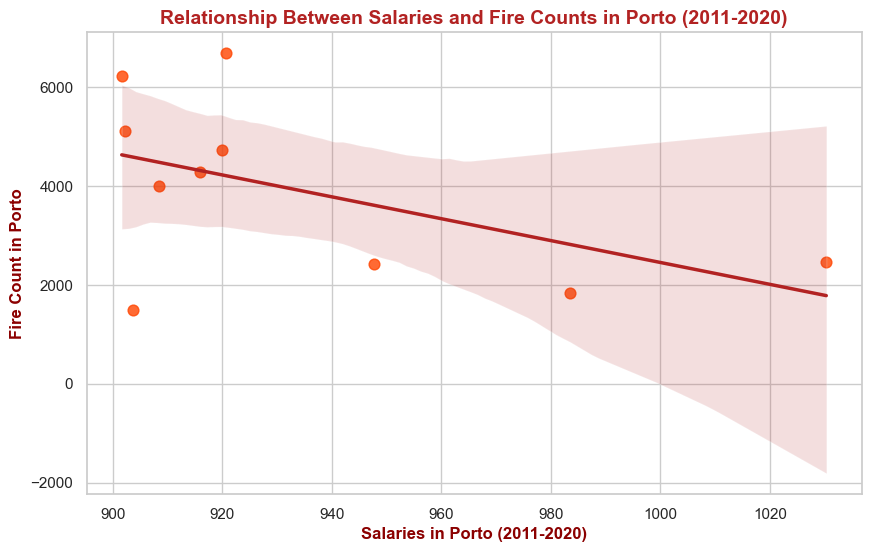

In [19]:


# Calculate correlation coefficient for fire counts and salaries
r_by_year_porto = np.corrcoef(fire_count_porto, salaries_porto_2011_2020)
print("Correlation coefficient:", r_by_year_porto[1, 0])

# Create regression plot with fiery color adjustments
plt.figure(figsize=(10, 6))
sns.regplot(
    x=salaries_porto_2011_2020, 
    y=fire_count_porto, 
    scatter_kws={'color': '#ff4500', 's': 60, 'alpha': 0.8},  # Scatter color and size
    line_kws={'color': '#b22222', 'linewidth': 2.5}  # Regression line color
)

# Set custom labels and title with fiery color theme
plt.xlabel("Salaries in Porto (2011-2020)", fontsize=12, color='#8b0000', weight='bold')
plt.ylabel("Fire Count in Porto", fontsize=12, color='#8b0000', weight='bold')
plt.title("Relationship Between Salaries and Fire Counts in Porto (2011-2020)", fontsize=14, color='#b22222', weight='bold')

plt.show()



#### Porto
- **Correlation Coefficient**: **-0.5172**
- **Interpretation**: The correlation coefficient for Porto indicates a moderate negative relationship between salaries and fire counts. As average salaries increase, fire incidents tend to decrease, suggesting that higher income levels might support better preventive resources or awareness campaigns. 


Correlation coefficient: -0.47800130526726575


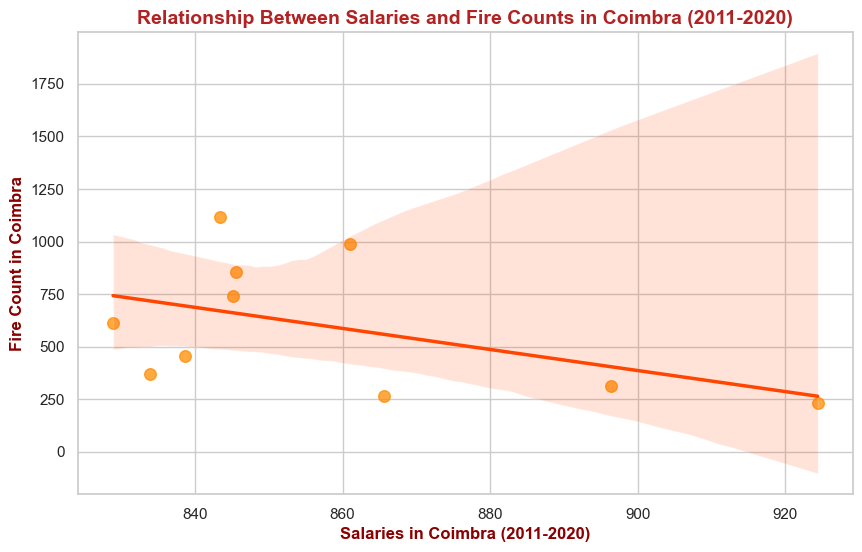

In [20]:

# Calculate correlation coefficient for fire counts and salaries in Coimbra
r_by_year_coimbra = np.corrcoef(fire_count_coimbra, salaries_coimbra_2011_2020)
print("Correlation coefficient:", r_by_year_coimbra[1, 0])

# Create regression plot with fiery color adjustments
plt.figure(figsize=(10, 6))
sns.regplot(
    x=salaries_coimbra_2011_2020, 
    y=fire_count_coimbra, 
    scatter_kws={'color': '#ff8c00', 's': 70, 'alpha': 0.75},  # Scatter color and size
    line_kws={'color': '#ff4500', 'linewidth': 2.5}  # Regression line color
)

# Set custom labels and title with fiery color theme
plt.xlabel("Salaries in Coimbra (2011-2020)", fontsize=12, color='#8b0000', weight='bold')
plt.ylabel("Fire Count in Coimbra", fontsize=12, color='#8b0000', weight='bold')
plt.title("Relationship Between Salaries and Fire Counts in Coimbra (2011-2020)", fontsize=14, color='#b22222', weight='bold')

plt.show()


#### Coimbra
- **Correlation Coefficient**: **-0.4780**
- **Interpretation**: Coimbra shows a similar trend to Porto, with a moderately negative correlation. This suggests that, like in Porto, higher salaries in Coimbra might contribute to reduced fire counts, potentially due to increased resources for fire prevention. However, the relationship is slightly weaker than in Porto, indicating that other factors could be influencing fire occurrences in Coimbra.


Correlation coefficient: -0.49350067934229824


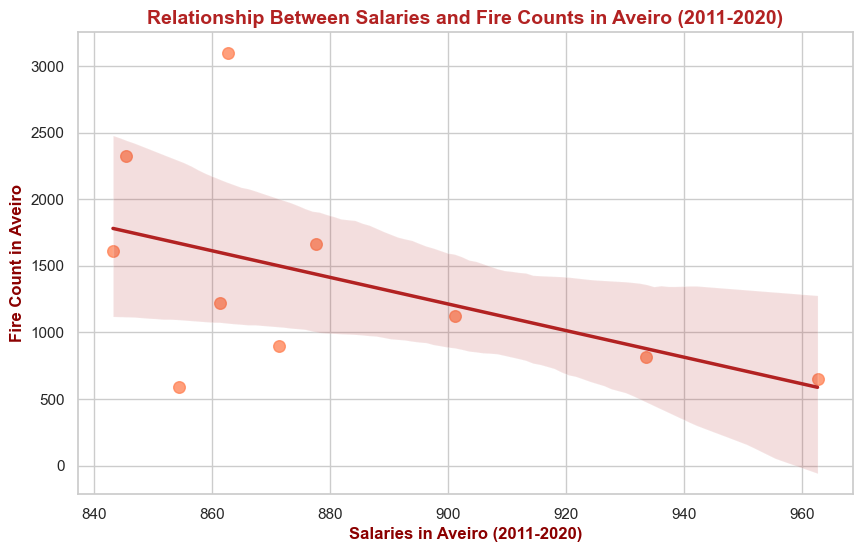

In [21]:
# Calculate correlation coefficient for fire counts and salaries in Aveiro
r_by_year_aveiro = np.corrcoef(fire_count_aveiro, salaries_aveiro_2011_2020)
print("Correlation coefficient:", r_by_year_aveiro[1, 0])

# Create regression plot with fiery color adjustments
plt.figure(figsize=(10, 6))
sns.regplot(
    x=salaries_aveiro_2011_2020, 
    y=fire_count_aveiro, 
    scatter_kws={'color': '#ff7f50', 's': 70, 'alpha': 0.75},  # Scatter color and size
    line_kws={'color': '#b22222', 'linewidth': 2.5}  # Regression line color
)

# Set custom labels and title with fiery color theme
plt.xlabel("Salaries in Aveiro (2011-2020)", fontsize=12, color='#8b0000', weight='bold')
plt.ylabel("Fire Count in Aveiro", fontsize=12, color='#8b0000', weight='bold')
plt.title("Relationship Between Salaries and Fire Counts in Aveiro (2011-2020)", fontsize=14, color='#b22222', weight='bold')

plt.show()


#### Aveiro
- **Correlation Coefficient**: **-0.4935**
- **Interpretation**: Aveiro presents a similar case with a moderately negative correlation between salaries and fire counts. This negative relationship implies that as salaries increase, fire counts tend to fall , suggesting a similar dynamic in Aveiro compared to Porto and Coimbra. 

In [22]:
# testing the significance of the correlation r_by_year
n_porto = len(fire_count_porto)
n_coimbra = len(fire_count_coimbra)
n_aveiro = len(fire_count_aveiro)

coef_porto = (2 / m.sqrt(n_porto))
coef_coimbra = (2 / m.sqrt(n_coimbra))
coef_aveiro = (2 / m.sqrt(n_aveiro))

if( abs(r_by_year_porto[1,0]) >= coef_porto):
    print("There is a significant linear correlation between the average salaries in Porto and the amount of fires in Porto at a significance level of 0.05")
else:
    print("There is no significant linear correlation between the average salaries in Porto and the amount of fires in Porto at a significance level of 0.05")

if( abs(r_by_year_coimbra[1,0]) >= coef_coimbra):
    print("There is a significant linear correlation between the average salaries in Coimbra and the amount of fires in Coimbra at a significance level of 0.05")
else:
    print("There is no significant linear correlation between the average salaries in Coimbra and the amount of fires in Coimbra at a significance level of 0.05")

if( abs(r_by_year_aveiro[1,0]) >= coef_aveiro):
    print("There is a significant linear correlation between the average salaries in Aveiro and the amount of fires in Aveiro at a significance level of 0.05")
else:
    print("There is no significant linear correlation between the average salaries in Aveiro and the amount of fires in Aveiro at a significance level of 0.05")




There is no significant linear correlation between the average salaries in Porto and the amount of fires in Porto at a significance level of 0.05
There is no significant linear correlation between the average salaries in Coimbra and the amount of fires in Coimbra at a significance level of 0.05
There is no significant linear correlation between the average salaries in Aveiro and the amount of fires in Aveiro at a significance level of 0.05


### Testing the Significance of Correlation Results

After calculating the correlation coefficients, we tested whether these correlations were statistically significant. Using a 0.05 significance level, we set up criteria to determine if the observed correlations in each district could be considered significant. This test checks if the correlation observed in each region is strong enough to be statistically meaningful.

The results are as follows:

- **Porto**: There is **no significant linear correlation** between average salaries and the number of fires in Porto at a 0.05 significance level.
- **Coimbra**: Similarly, there is **no significant linear correlation** between average salaries and fire counts in Coimbra at the same significance level.
- **Aveiro**: Lastly, there is **no significant linear correlation** between average salaries and fire counts in Aveiro at a 0.05 significance level.

These findings suggest that, while there may be observable trends in the correlation between salaries and fire incidents, these correlations are not statistically significant for the given data. This indicates that other factors, potentially beyond salary levels alone, may better explain fire occurrence patterns across these districts.


### Resarch Question 3: What effect did the 2017 wildfire prevention laws have on the frequency of fires

To analyze whether the number of fires in specific districts (Porto, Coimbra, and Aveiro) changed significantly between 2016 and 2018, we conducted a hypothesis test for the difference in means of fire counts. For each district, we sampled data from 2016 and 2018, taking 400 samples per year, each repeated 500 times. 

We tested the hypothesis as follows:
- **Null Hypothesis (\(H_0\))**: The mean fire count in 2016 is equal to the mean fire count in 2018 for each district.
- **Alternative Hypothesis (\(H_1\))**: The mean fire count in 2016 is not equal to the mean fire count in 2018.

Using our custom hypothesis test function, we calculated the means and standard deviations for each year and each district, then obtained the test statistic and p-value. The following results summarize the findings:


In [23]:
def hypothesis_test_two_means(alpha, mean1, mean2, sd1, sd2, n1, n2, two_sided=True):
    """
    Performs a hypothesis test for the difference between two means.
    Args:
        alpha (float): Significance level.
        mean1 (float): Sample mean for group 1.
        mean2 (float): Sample mean for group 2.
        sd1 (float): Sample standard deviation for group 1.
        sd2 (float): Sample standard deviation for group 2.
        n1 (int): Sample size for group 1.
        n2 (int): Sample size for group 2.
        two_sided (bool, optional): Whether to perform a two-sided test. Defaults to True.
    Returns:
        float: The calculated p-value.
    """

    standard_error = m.sqrt((sd1**2 / n1) + (sd2**2 / n2))
    statistic = (mean1 - mean2) / standard_error

    print(f"statistic: {statistic}")
    statistic = abs(statistic)

    n = min(n1, n2)
    p_value = (
        (2 * (1 - stats.t.cdf(statistic, n - 1)))
        if (two_sided)
        else (1 - stats.t.cdf(statistic, n - 1))
    )

    print(f"p-value: {p_value}")

    if p_value < alpha:
        print("reject null hypothesis")
    else:
        print("fail to reject null hypothesis")

    return p_value


In [24]:
import statistics

# Sample parameters
sample_size = 400
num_samples = 500
counts_2016, counts_2018 = [], []
sample_dataframes = []

# Filter data for each year and count specific districts
filtered_data_2016 = df_fires_extract[df_fires_extract['Ano'] == 2016]
filtered_data_2018 = df_fires_extract[df_fires_extract['Ano'] == 2018]

for i in range(num_samples):
    # Sampling for the year 2016
    sample_2016 = filtered_data_2016.sample(n=min(sample_size, len(filtered_data_2016)), random_state=i)
    counts_2016.append(len(sample_2016[sample_2016['Distrito'] == "Porto"]))
    sample_dataframes.append(sample_2016)

    # Sampling for the year 2018
    sample_2018 = filtered_data_2018.sample(n=min(sample_size, len(filtered_data_2018)), random_state=i)
    counts_2018.append(len(sample_2018[sample_2018['Distrito'] == "Porto"]))
    sample_dataframes.append(sample_2018)

# Visualize example counts
print("Counts 2016:", counts_2016[:5])
print("Counts 2018:", counts_2018[:5])

# Calculate mean and standard deviation using the statistics library
mean_2016 = statistics.mean(counts_2016)
mean_2018 = statistics.mean(counts_2018)

std_2016 = statistics.stdev(counts_2016)
std_2018 = statistics.stdev(counts_2018)

# Perform hypothesis test using your custom function
hypothesis_test_two_means(0.05, mean_2016, mean_2018, std_2016, std_2018, sample_size, sample_size)



Counts 2016: [116, 93, 98, 103, 102]
Counts 2018: [75, 74, 78, 67, 78]
statistic: 47.25535195336624
p-value: 0.0
reject null hypothesis


np.float64(0.0)

### Porto
- **Test Statistic**: 47.255
- **p-value**: 0.0
- **Conclusion**: Reject the null hypothesis. The data indicates a significant difference in the number of fires between 2016 and 2018 in Porto.


In [25]:
import statistics

# Sample parameters
sample_size = 400
num_samples = 500
counts_2016, counts_2018 = [], []
sample_dataframes = []

# Filter data for each year and count specific districts
filtered_data_2016 = df_fires_extract[df_fires_extract['Ano'] == 2016]
filtered_data_2018 = df_fires_extract[df_fires_extract['Ano'] == 2018]

for i in range(num_samples):
    # Sampling for the year 2016
    sample_2016 = filtered_data_2016.sample(n=min(sample_size, len(filtered_data_2016)), random_state=i)
    counts_2016.append(len(sample_2016[sample_2016['Distrito'] == "Coimbra"]))
    sample_dataframes.append(sample_2016)

    # Sampling for the year 2018
    sample_2018 = filtered_data_2018.sample(n=min(sample_size, len(filtered_data_2018)), random_state=i)
    counts_2018.append(len(sample_2018[sample_2018['Distrito'] == "Coimbra"]))
    sample_dataframes.append(sample_2018)

# Visualize example counts
print("Counts 2016:", counts_2016[:5])
print("Counts 2018:", counts_2018[:5])

# Calculate mean and standard deviation using the statistics library
mean_2016 = statistics.mean(counts_2016)
mean_2018 = statistics.mean(counts_2018)

std_2016 = statistics.stdev(counts_2016)
std_2018 = statistics.stdev(counts_2018)

# Perform hypothesis test using your custom function
hypothesis_test_two_means(0.05, mean_2016, mean_2018, std_2016, std_2018, sample_size, sample_size)

Counts 2016: [3, 14, 12, 13, 8]
Counts 2018: [7, 10, 10, 7, 16]
statistic: 10.819911428328144
p-value: 0.0
reject null hypothesis


np.float64(0.0)

#### Coimbra
- **Test Statistic**: 10.82
- **p-value**: 0.0
- **Conclusion**: Reject the null hypothesis. This suggests a significant change in the number of fires in Coimbra between 2016 and 2018.


In [26]:
import statistics

# Sample parameters
sample_size = 400
num_samples = 500
counts_2016, counts_2018 = [], []
sample_dataframes = []

# Filter data for each year and count specific districts
filtered_data_2016 = df_fires_extract[df_fires_extract['Ano'] == 2016]
filtered_data_2018 = df_fires_extract[df_fires_extract['Ano'] == 2018]

for i in range(num_samples):
    # Sampling for the year 2016
    sample_2016 = filtered_data_2016.sample(n=min(sample_size, len(filtered_data_2016)), random_state=i)
    counts_2016.append(len(sample_2016[sample_2016['Distrito'] == "Aveiro"]))
    sample_dataframes.append(sample_2016)

    # Sampling for the year 2018
    sample_2018 = filtered_data_2018.sample(n=min(sample_size, len(filtered_data_2018)), random_state=i)
    counts_2018.append(len(sample_2018[sample_2018['Distrito'] == "Aveiro"]))
    sample_dataframes.append(sample_2018)

# Visualize example counts
print("Counts 2016:", counts_2016[:5])
print("Counts 2018:", counts_2018[:5])

# Calculate mean and standard deviation using the statistics library
mean_2016 = statistics.mean(counts_2016)
mean_2018 = statistics.mean(counts_2018)

std_2016 = statistics.stdev(counts_2016)
std_2018 = statistics.stdev(counts_2018)

# Perform hypothesis test using your custom function
hypothesis_test_two_means(0.05, mean_2016, mean_2018, std_2016, std_2018, sample_size, sample_size)

Counts 2016: [19, 21, 14, 25, 22]
Counts 2018: [42, 39, 32, 40, 32]
statistic: -38.92770921366541
p-value: 0.0
reject null hypothesis


np.float64(0.0)

#### Aveiro
- **Counts (First 5 Samples)**: 2016 - [19, 21, 14, 25, 22], 2018 - [42, 39, 32, 40, 32]
- **Test Statistic**: -38.93
- **p-value**: 0.0
- **Conclusion**: Reject the null hypothesis. The results show a significant difference in fire counts in Aveiro between the two years.

Overall, the tests indicate that the number of fires experienced a statistically significant shift from 2016 to 2018 across all three districts, supporting the idea that external factors—possibly including socioeconomic variables or changes in fire prevention measures—may have influenced the observed trends.


### ANOVA Test for Effectiveness of Fire Prevention Laws Over Time (2018-2020)

To evaluate whether the effect of fire prevention laws continued in the years following 2018, we applied an ANOVA test to the fire count data from Porto for 2018, 2019, and 2020. Our objective was to determine if 2018 was an anomaly or if similar trends continued in subsequent years. 


In [27]:
target_district = "Porto"  # Adjust year as needed
sample_size = 400
num_samples = 200
counts_2018, counts_2019, counts_2020 = [], [], []
sample_dataframes = []

filtered_data = df_fires_extract[df_fires_extract['Distrito'] == target_district]

print(len(filtered_data))

for i in range(num_samples):
    # Criar uma amostra do distrito com um tamanho específico
    sample = filtered_data.sample(n=min(sample_size, len(filtered_data)), random_state=i)
    
    # Contagens específicas para cada ano
    counts_2018.append(len(sample[sample['Ano'] == 2018]))
    counts_2019.append(len(sample[sample['Ano'] == 2019]))
    counts_2020.append(len(sample[sample['Ano'] == 2020]))
    
    sample_dataframes.append(sample)

# Exemplo de visualização das contagens de incêndios
print("Counts 2011:", counts_2018[:5])
print("Counts 2016:", counts_2019[:5])
print("Counts 2019:", counts_2020[:5])

39296
Counts 2011: [23, 22, 23, 28, 30]
Counts 2016: [19, 14, 17, 16, 19]
Counts 2019: [32, 17, 34, 23, 16]


#### Preliminary Normality Check Using the Shapiro-Wilk Test

Before performing ANOVA, we conducted the Shapiro-Wilk test to assess the normality of fire count distributions for each year. Here are the p-values from the test:

- **2018 Shapiro-Wilk p-value**: 0.126
- **2019 Shapiro-Wilk p-value**: 0.117
- **2020 Shapiro-Wilk p-value**: 0.179

Since all p-values are above the significance level of 0.05, we cannot reject the null hypothesis of normality. This suggests that fire counts in each year are approximately normally distributed, allowing us to proceed with the ANOVA test.

#### Visualizing Fire Count Distribution (Histograms)

To further understand the data distributions, we plotted histograms for the fire counts in each year:


2018 Shapiro-Wilk p-value: 0.12562868726912335
2019 Shapiro-Wilk p-value: 0.11673255973952765
2020 Shapiro-Wilk p-value: 0.17922783144653126


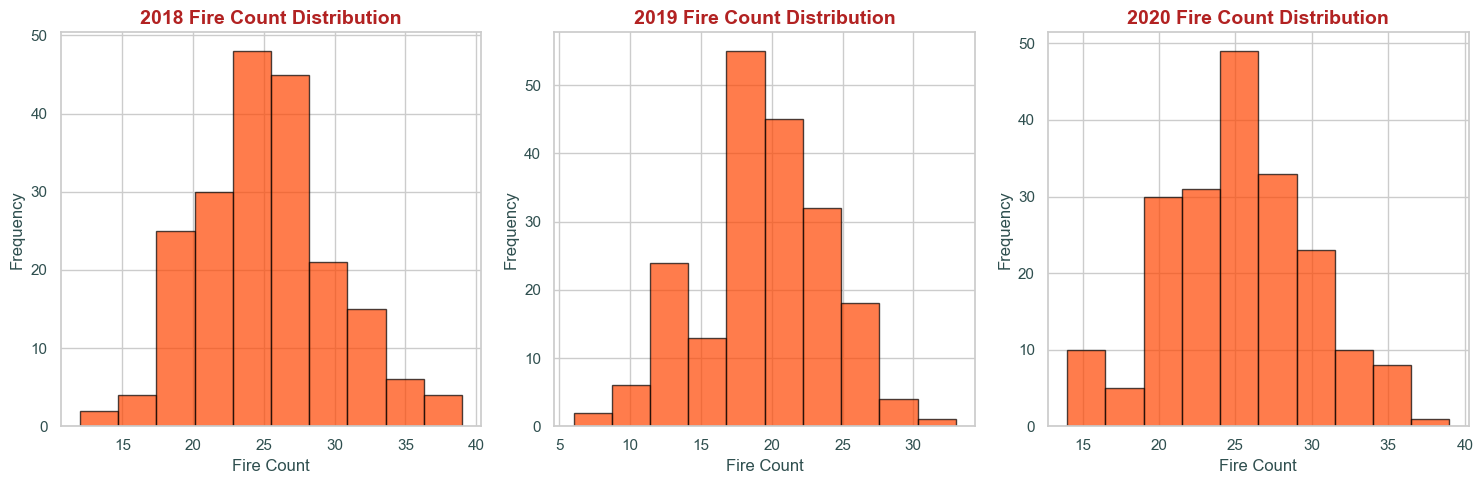

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (counts, year) in enumerate(zip([counts_2018, counts_2019, counts_2020], [2018, 2019, 2020])):
    axes[i].hist(counts, bins=10, alpha=0.7, color='#FF4500', edgecolor='black')  # Fiery orange color
    axes[i].set_title(f'{year} Fire Count Distribution', fontsize=14, fontweight='bold', color='firebrick')
    axes[i].set_xlabel('Fire Count', fontsize=12, color='darkslategray')
    axes[i].set_ylabel('Frequency', fontsize=12, color='darkslategray')
    axes[i].tick_params(axis='x', colors='darkslategray')
    axes[i].tick_params(axis='y', colors='darkslategray')

    print(f'{year} Shapiro-Wilk p-value:', stats.shapiro(counts).pvalue)

fig.tight_layout()
plt.show()


### Testing for Homogeneity of Variance Using Levene's Test

To proceed with the ANOVA analysis, we needed to verify if the variances in fire counts for the years 2018, 2019, and 2020 were homogenous. This is crucial, as ANOVA assumes equal variances across groups. We applied Levene’s test to assess the equality of variances, with results as follows:

- **Levene’s Test p-value**: 0.675
  - Since the p-value is significantly higher than our threshold of 0.05, we do not reject the null hypothesis. This indicates that the variances across the years are statistically similar, satisfying the assumption of homogeneity.

#### Variance Values by Year:
- **Variance for 2018**: 23.18
- **Variance for 2019**: 20.43
- **Variance for 2020**: 21.51

These variances are quite close to each other, supporting the results from Levene’s test.

#### Boxplot of Fire Counts by Year

To further visualize variance consistency, we created a boxplot for the fire counts across 2018, 2019, and 2020. Here, fiery color tones were used to represent each year’s box:


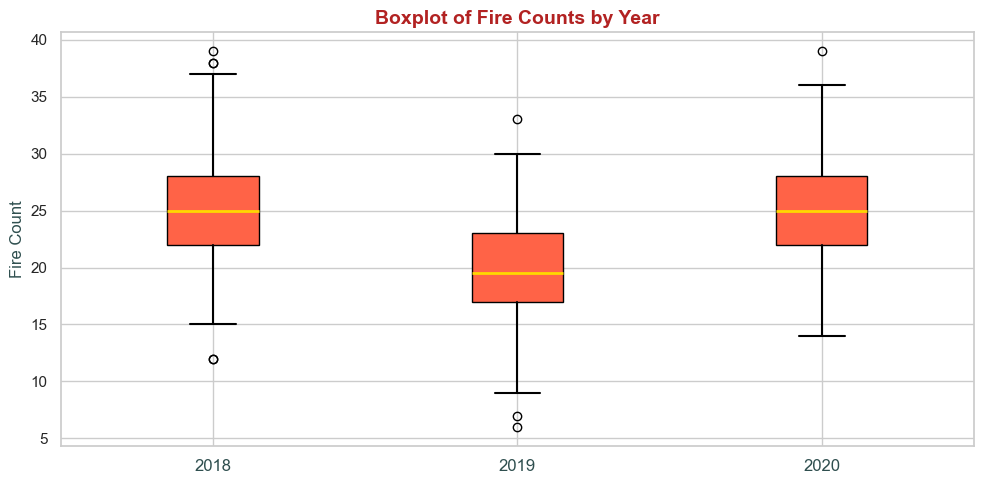

Levene’s test for equal variances, p-value: 0.6754729694177636
Variance for 2018: 23.182974999999995
Variance for 2019: 20.4331
Variance for 2020: 21.5096


In [29]:
# Levene's test for homogeneity of variances
fig, ax = plt.subplots(figsize=(10, 5))

# Customize the boxplot with fiery colors
ax.boxplot(
    [counts_2018, counts_2019, counts_2020], 
    vert=True, 
    patch_artist=True,
    boxprops=dict(facecolor='#FF6347', color='black'),  # Fiery tomato color for boxes
    medianprops=dict(color='gold', linewidth=2),  # Gold line for median
    whiskerprops=dict(color='black', linewidth=1.5),  # Black whiskers
    capprops=dict(color='black', linewidth=1.5)  # Black caps
)

# Set custom tick labels and titles
ax.set_xticklabels(['2018', '2019', '2020'], fontsize=12, color='darkslategray')
ax.set_title('Boxplot of Fire Counts by Year', fontsize=14, fontweight='bold', color='firebrick')
ax.set_ylabel('Fire Count', fontsize=12, color='darkslategray')

plt.tight_layout()
plt.show()

# Levene's test and variance print statements
levene_pvalue = stats.levene(counts_2018, counts_2019, counts_2020).pvalue
print('Levene’s test for equal variances, p-value:', levene_pvalue)

print("Variance for 2018:", np.var(counts_2018))
print("Variance for 2019:", np.var(counts_2019))
print("Variance for 2020:", np.var(counts_2020))


In [30]:
data = pd.DataFrame({
    'Fire_Count': counts_2018 + counts_2019 + counts_2020,
    'Year': ['2018'] * len(counts_2018) + ['2019'] * len(counts_2019) + ['2020'] * len(counts_2020)
})

# Fitting the model and performing ANOVA
model = ols('Fire_Count ~ Year', data=data).fit()
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
Year,2.0,4400.263333,2200.131667,100.841842,1.859758e-38
Residual,597.0,13025.135000,21.817647,NaN,NaN


### ANOVA Test for Fire Counts Across Years

With the assumptions of normality and homogeneity of variances met, we proceeded to conduct an ANOVA test to determine if there were significant differences in the average fire counts among the years 2018, 2019, and 2020. This helps to assess whether the year 2018 was unique or if similar patterns persisted across the following years.

#### ANOVA Results:
- **F-statistic**: 100.84
- **p-value**: 1.86e-38

Given the extremely low p-value, well below the significance level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in fire counts between at least two of the years analyzed.

These results confirm that 2018 was indeed a distinctive year in terms of fire frequency when compared with 2019 and 2020, suggesting a potential impact from legislative or environmental changes implemented during or after 2018.

In [31]:
from scipy.stats import f_oneway
# 1. Prepare the data in a dictionary format for simplicity
data_dict = {
    '2018': counts_2018,
    '2019': counts_2019,
    '2020': counts_2020
}

# 2. Convert the dictionary to a DataFrame (optional step for organization)
data_df = pd.DataFrame(data_dict)

# 3. Perform ANOVA using scipy's f_oneway function
f_stat, p_value = f_oneway(data_df['2018'], data_df['2019'], data_df['2020'])

# Display the ANOVA results
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 100.84184194635993
p-value: 1.8597575544859608e-38



### Interpretation of Results

- **2018 vs. 2019**: The mean difference in the number of fires between 2018 and 2019 was -5.835, with a p-value of 0.0. This result indicates a statistically significant decrease in the number of wildfires from 2018 to 2019, suggesting that the laws implemented may have had a positive effect.
  
- **2018 vs. 2020**: The mean difference between 2018 and 2020 was -0.185, with a p-value of 0.9172. This result is not statistically significant, indicating that there was no substantial change in the number of wildfires between these two years.

- **2019 vs. 2020**: The mean difference between 2019 and 2020 was 5.65, with a p-value of 0.0, indicating a statistically significant increase in the number of wildfires from 2019 to 2020.


The results of the Tukey's post hoc test provide evidence that the wildfire legislation introduced in 2017 had an immediate impact in reducing the number of wildfires in 2018 compared to 2019. However, the increase in the number of wildfires observed in 2020 raises questions about the long-term effectiveness of these laws. Further research is needed to explore the factors contributing to this increase and to evaluate the sustainability of wildfire management strategies in Portugal.


In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste post hoc de Tukey
posthoc_results = pairwise_tukeyhsd(data['Fire_Count'], data['Year'])
print(posthoc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2018   2019   -5.835    0.0 -6.9325 -4.7375   True
  2018   2020   -0.185 0.9172 -1.2825  0.9125  False
  2019   2020     5.65    0.0  4.5525  6.7475   True
----------------------------------------------------


## Conclusion

This project provides a comprehensive analysis of the relationship between socioeconomic factors and wildfire occurrences in Portugal, focusing on three key areas: population density, average salaries, and the impact of wildfire prevention laws implemented in 2017.

1. **Population Density and Fire Incidences**: Our analysis indicated a statistically significant positive correlation between population density and the number of fires. This finding aligns with expectations that higher population densities may lead to increased fire risks, likely due to human activities and urban expansion. The linear regression confirmed the validity of this relationship, supporting the hypothesis that densely populated areas face more fire incidents.

2. **Salaries and Fire Counts**: The investigation into the impact of average salaries on fire occurrences revealed negative correlations across all districts studied, including Porto, Coimbra, and Aveiro. This suggests that higher salaries may lead to fewer fires due to better resources for prevention. However, these correlations were not statistically significant, indicating that salary levels alone do not sufficiently explain patterns of fire occurrences.

3. **Effectiveness of Wildfire Prevention Laws**: The hypothesis testing conducted to evaluate the impact of the 2017 wildfire prevention laws showed significant differences in fire counts from 2016 to 2018 across all districts. ANOVA results confirmed that 2018 was a distinct year with significantly lower fire counts compared to the subsequent years. However, the increase in fire counts from 2019 to 2020 raises concerns about the long-term effectiveness of these laws, indicating a potential need for ongoing evaluation and adaptation of wildfire management strategies.

## Looking Back

Reflecting on the findings, it's clear that the initial hypotheses regarding population density and wildfire occurrences were well-supported. However, the relationship between salaries and fire counts requires further investigation, as other socioeconomic and environmental factors may play a crucial role in influencing fire risks.

The significant impact of the 2017 wildfire prevention laws demonstrates the potential effectiveness of policy measures in reducing fire occurrences, underscoring the importance of implementing and enforcing such regulations. Yet, the subsequent rise in fire counts suggests that the effectiveness of these laws may be influenced by various external factors, including climate conditions, land management practices, and community awareness.

## Looking Ahead

Moving forward, future research should explore the underlying causes of the observed trends, particularly regarding salary impacts and the fluctuations in fire counts post-2018. Investigating the interplay between socioeconomic factors and environmental conditions can yield deeper insights into fire risk management.

Additionally, the development of targeted interventions and community engagement strategies could help address the identified trends and enhance the sustainability of wildfire management efforts in Portugal. As climate change continues to affect fire dynamics, ongoing monitoring and adaptive management strategies will be critical in mitigating fire risks and ensuring community safety.
